## Определение перспективного тарифа для телеком компании

 Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
 
 
 Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
### Описание тарифов
 #### Тариф «Смарт»
 - Ежемесячная плата: 550 рублей
 - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
 - минута разговора: 3 рубля
 - сообщение: 3 рубля
 - 1 Гб интернет-трафика: 200 рублей


#### Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей
 
Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. 

### В данной работе надо выполнить следующие шаги:

Шаг 1. Открыть файл и изучить информацию.

Шаг 2. Предобработка данных:
 - привести данные к нужным типам 
 - найти и исправить ошибки в данных, пояснить, какие ошибки нашли и как их исправили
 
 - посчитать для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Шаг 3. Проанализировать данные
- Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Шаг 4. Проверить гипотезы
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
Пороговое значение alpha задайте самостоятельно.
 - Пояснить:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.

Шаг 5. Общий вывод

### Описание данных

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
#загрузим библитеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy import stats as st 

In [2]:
calls = pd.read_csv('/datasets/calls.csv', sep = ',')
calls.head(10)
# calls.columns

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
calls.columns
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
traffic =  pd.read_csv('/datasets/internet.csv')
traffic.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
traffic.columns
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
users = pd.read_csv('/datasets/users.csv')
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Вывод
В данных нет пропусков, за исключением даты за исключением "churn_date" (дата прекращения пользования тарифом), но в расшифровке отдельно указано значение пропусков (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). У большого количества звонков и потраченного интернета длительность — 0.0 минут/мегабайт. Надо поменять тип данных на формат даты и удалить лишний столбец в таблице с информацией по интернету("traffic")


### Шаг 2. Предобработка данных

### Замена типа данных

Нужно  произвести замены на тип 'date': 
- в таблице "calls" столбец  'call_date' 
- в таблице "traffic" столбец  'session_date' 
- в таблице "messages" столбец  'message_date' 
- в таблице "users" столбец  'churn_date' 
- в таблице "users" столбец  'reg_date' 

Формат даты в таблицах одинаков : год-месяц-день

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
# calls.info()

In [13]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

In [14]:
# вспомним таблицу с лишним столбцом,а также посмотрим на запись даты
traffic.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [15]:
# удалим лишний столбец
try:
    traffic.drop('Unnamed: 0', axis=1, inplace=True)
except:
    print('Уже удален') 

In [16]:
traffic['session_date'] = pd.to_datetime(traffic['session_date'], format = '%Y-%m-%d %H:%M:%S')
traffic.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Округлим значение звонков и интернета до целых значений с округлением вверх

In [17]:
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)
traffic['mb_used'] = traffic['mb_used'].apply(np.ceil).astype(int)

### Рассмотрим данные на наличие ошибок

In [18]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfe42f8bd0>]],
      dtype=object)

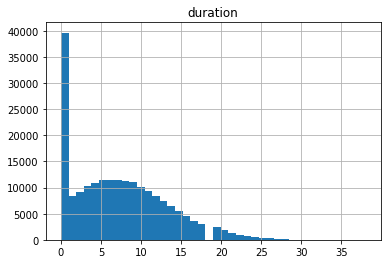

In [19]:
# построим гистограмму длительности звонков
calls.hist('duration', bins=40)


Больше 35 тысяч звонков с длительностью около 0 минут. Возможно, это отклоненные или непринятые вызовы и тогда это ошибка в данных. Самым главным здесь является вопрос, считает ли "Мегалайн" эти вызовы совершенными и берет ли за них плату. Предположим, что "Мегалайн" считает вызовы совершенными и считает это за потраченную минуту, поэтому прибавим к нулевым значениям 1. 

In [20]:
calls.loc[calls['duration'] == 0, 'duration'] = 1
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [21]:
traffic.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


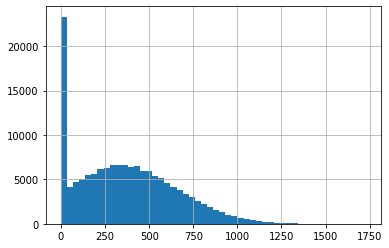

In [22]:
# построим гистограмму длительности интернет-сессий
traffic['mb_used'].hist(bins=50)

In [23]:
# посчитаем количество строк с трафиком интернета = 0 Мб
traffic[traffic['mb_used'] == 0]['mb_used'].count()

19598

В таблице почти 20 тысяч строк с трафиком интернета = 0 Мб. Значения скорее всего появились, когда телефон в автоматическом режиме выходит в интернет, тратя при этом всего несколько килобайт, в разультате при машинном округлении это превратилось в 0 мегабайт. Будем считать, что "Мегалайн" считает сессию открытой и считает это за потраченный мегабайт, поэтому прибавим к нулевым значениям 1. 

In [24]:
traffic.loc[traffic['mb_used'] == 0,'mb_used' ] = 1

In [25]:
# проверим количество интернета = 0 Мб
traffic[traffic['mb_used'] == 0]['mb_used'].count()

0

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам. Для начала добавим в датасет calls столбец с номером месяца

In [26]:
# добавим в датасет calls столбец с номером месяца
calls['month'] = calls['call_date'].dt.month
#  сводная таблица для каждого пользователя по месяцам по сделанным звонкам
calls_month = calls.pivot_table(index = ['user_id','month'], values= ['duration'],
                                aggfunc = ['count', 'sum'])
# переименуем столбцы
calls_month.columns = ['count_calls', 'sum_calls']
# удалим двойные индексы
calls_month = calls_month.reset_index()
calls_month


,user_id,month,count_calls,sum_calls
0,1000,5,22,164
1,1000,6,43,187
2,1000,7,47,346
3,1000,8,52,418
4,1000,9,58,478
...,...,...,...,...
3169,1498,10,41,258
3170,1499,9,9,71
3171,1499,10,68,473
3172,1499,11,74,624


Посчитаем для каждого пользователя количество отправленных сообщений по месяцам

In [27]:
# добавим в датасет messages столбец с номером месяца
messages['month'] = messages['message_date'].dt.month
#  сводная таблица для каждого пользователя по месяцам по сообщениям
messages_month = messages.pivot_table(index = ['user_id','month'], values= ['id'],
                                aggfunc = ['count'])
messages_month.columns = ['count_message']
messages_month = messages_month.reset_index()
messages_month

,user_id,month,count_message
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Соединим таблицу по звонкам и сообщениям в общую таблицу proceeds_month

In [28]:
proceeds_month=[]
proceeds_month = calls_month.merge(messages_month, on=['user_id', 'month'],how='left')
proceeds_month

,user_id,month,count_calls,sum_calls,count_message
0,1000,5,22,164,22.0
1,1000,6,43,187,60.0
2,1000,7,47,346,75.0
3,1000,8,52,418,81.0
4,1000,9,58,478,57.0
...,...,...,...,...,...
3169,1498,10,41,258,42.0
3170,1499,9,9,71,11.0
3171,1499,10,68,473,48.0
3172,1499,11,74,624,59.0


Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам

In [29]:
# добавим в датасет traffic столбец с номером месяца
traffic['month'] = traffic['session_date'].dt.month
#  сводная таблица для каждого пользователя по месяцам по интернет-сессиям
traffic_month = traffic.pivot_table(index = ['user_id','month'],  values= ['mb_used'],
                                aggfunc = ['sum'])
traffic_month.columns = ['mb_used']
traffic_month.head()

mb_used
user_id month         
1000    5         2257
        6        23262
        7        14017
        8        14072
        9        14583

Присоединим к таблице proceeds_month данные по интернет-сессиям 

In [30]:
proceeds_month = proceeds_month.merge(traffic_month, on=['user_id', 'month'],how='left')
proceeds_month.head()

,user_id,month,count_calls,sum_calls,count_message,mb_used
0,1000,5,22,164,22.0,2257.0
1,1000,6,43,187,60.0,23262.0
2,1000,7,47,346,75.0,14017.0
3,1000,8,52,418,81.0,14072.0
4,1000,9,58,478,57.0,14583.0


Добавим название тарифа из информации по пользователям

In [31]:
proceeds_month = proceeds_month.merge(users[['tariff','user_id']], on='user_id',how='left')
proceeds_month.head(10)


,user_id,month,count_calls,sum_calls,count_message,mb_used,tariff
0,1000,5,22,164,22.0,2257.0,ultra
1,1000,6,43,187,60.0,23262.0,ultra
2,1000,7,47,346,75.0,14017.0,ultra
3,1000,8,52,418,81.0,14072.0,ultra
4,1000,9,58,478,57.0,14583.0,ultra
5,1000,10,57,363,73.0,14717.0,ultra
6,1000,11,43,344,58.0,14769.0,ultra
7,1000,12,46,341,70.0,9829.0,ultra
8,1001,11,59,444,NaN,18460.0,smart
9,1001,12,63,430,NaN,14059.0,smart


In [32]:
# переименуем столбец с именем тарифа, чтобы можно было соединить таблицу с информацией по тарифу
proceeds_month.rename(columns={'tariff': 'tariff_name'}, inplace=True)
proceeds_month

,user_id,month,count_calls,sum_calls,count_message,mb_used,tariff_name
0,1000,5,22,164,22.0,2257.0,ultra
1,1000,6,43,187,60.0,23262.0,ultra
2,1000,7,47,346,75.0,14017.0,ultra
3,1000,8,52,418,81.0,14072.0,ultra
4,1000,9,58,478,57.0,14583.0,ultra
...,...,...,...,...,...,...,...
3169,1498,10,41,258,42.0,20614.0,smart
3170,1499,9,9,71,11.0,1849.0,smart
3171,1499,10,68,473,48.0,17824.0,smart
3172,1499,11,74,624,59.0,17994.0,smart


In [33]:
# добавим в таблицу информацию по тарифам
proceeds_month = proceeds_month.merge(tariffs, on='tariff_name',how='left')

proceeds_month.head(10)


,user_id,month,count_calls,sum_calls,count_message,mb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,164,22.0,2257.0,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43,187,60.0,23262.0,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47,346,75.0,14017.0,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52,418,81.0,14072.0,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58,478,57.0,14583.0,ultra,1000,30720,3000,1950,150,1,1
5,1000,10,57,363,73.0,14717.0,ultra,1000,30720,3000,1950,150,1,1
6,1000,11,43,344,58.0,14769.0,ultra,1000,30720,3000,1950,150,1,1
7,1000,12,46,341,70.0,9829.0,ultra,1000,30720,3000,1950,150,1,1
8,1001,11,59,444,NaN,18460.0,smart,50,15360,500,550,200,3,3
9,1001,12,63,430,NaN,14059.0,smart,50,15360,500,550,200,3,3


Рассчитаем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [34]:
def func(df):
    df = df.copy()
#     абонентская плата
    df['proceed'] = df['rub_monthly_fee']
#     прибавим превышение по минутам разговора сверх лимита и умножим на значение из тарифного плана
    if df['sum_calls'] > df['minutes_included']:
        df['proceed'] = (
            df['proceed'] + (df['sum_calls'] - df['minutes_included']) * df['rub_per_minute']
        )
#    превышение по сообщениям  сверх лимита 
    if df['count_message'] > df['messages_included']:
        df['proceed'] = (
                df['proceed'] + (df['count_message']-df['messages_included'])*df['rub_per_message']
            )
#    превышение по трафику интернета сверх лимита с округлением до гБ
    if df['mb_used'] > df['mb_per_month_included']:
        df['proceed'] = (
            df['proceed'] +
            math.ceil((df['mb_used']-df['mb_per_month_included'])/1000)
            *df['rub_per_gb']
                )
                        
    return df
proceeds_month = proceeds_month.apply(func, axis=1)
proceeds_month.head(10)
        
    

,user_id,month,count_calls,sum_calls,count_message,mb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,proceed
0,1000,5,22,164,22.0,2257.0,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,43,187,60.0,23262.0,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,47,346,75.0,14017.0,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,52,418,81.0,14072.0,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,58,478,57.0,14583.0,ultra,1000,30720,3000,1950,150,1,1,1950.0
5,1000,10,57,363,73.0,14717.0,ultra,1000,30720,3000,1950,150,1,1,1950.0
6,1000,11,43,344,58.0,14769.0,ultra,1000,30720,3000,1950,150,1,1,1950.0
7,1000,12,46,341,70.0,9829.0,ultra,1000,30720,3000,1950,150,1,1,1950.0
8,1001,11,59,444,NaN,18460.0,smart,50,15360,500,550,200,3,3,1350.0
9,1001,12,63,430,NaN,14059.0,smart,50,15360,500,550,200,3,3,550.0


### Вывод

В этом шаге проведена подготовка данных, создана итоговая таблица "proceeds_month", где для каждого пользователя посчитана:
- количество сделанных звонков (count_calls) и израсходованных минут разговора по месяцам(sum_calls);
- количество отправленных сообщений по месяцам (count_message);
- объем израсходованного интернет-трафика по месяцам (mb_used);
- помесячную выручку с каждого пользователя (proceed)

    

### Шаг 3. Проанализируйте данные
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [35]:
# сгруппированная таблица по тарифам 'smart', 'ultra' по значениям
# включенных в тариф и  потраченных в среднем за месяц минут, sms, мегабайтов
# а также средняя ежемесячная выручка
proceeds_month.groupby('tariff_name').agg(
    {'proceed': ['mean'], 'sum_calls':['mean'], 'minutes_included':['mean'], 'count_message': ['mean'], 
     'messages_included': ['mean'], 'mb_used':['mean'], 'mb_per_month_included': ['mean'], 
     
    }
)

,proceed,sum_calls,minutes_included,count_message,messages_included,mb_used,mb_per_month_included
,mean,mean,mean,mean,mean,mean,mean
tariff_name,,,,,,,
smart,1324.736842,430.609987,500,38.747390,50,16245.468047,15360
ultra,2074.132492,560.113565,3000,61.195538,1000,19689.385760,30720


Абоненты тарифного плана 'smart' в среднем используют почти все минуты и сообщения, включенные в тариф, а средний трафик интернета выше лимита. Абоненты тарифного плана 'ultra' в среднем не превышают лимита, включенного в тариф. Абонентская плата 'smart' составляет 550 руб, абонентская плата 'ultra' 1950 руб. Таким образом, средний ежемесячный чек абонента "ultra" не намного превышает абонентскую плату, средний ежемесячный чек абонента "smart" превышает почти в 2.5 раза. 

In [36]:
# оставим в таблице summary_months_used нужные столбцы
# суммарное количество звонков, сообщений и интернет-трафика по месяцам и выручка по пользователям

summary_months_used = proceeds_month[
    ['user_id','month','count_calls', 'sum_calls', 'count_message', 'mb_used','tariff_name', 'proceed']
]
# заполним 0 пропущенные значения, образовавшиеся в результате слияния таблиц
summary_months_used = summary_months_used.fillna(0)

summary_months_used.head(10)

,user_id,month,count_calls,sum_calls,count_message,mb_used,tariff_name,proceed
0,1000,5,22,164,22.0,2257.0,ultra,1950.0
1,1000,6,43,187,60.0,23262.0,ultra,1950.0
2,1000,7,47,346,75.0,14017.0,ultra,1950.0
3,1000,8,52,418,81.0,14072.0,ultra,1950.0
4,1000,9,58,478,57.0,14583.0,ultra,1950.0
5,1000,10,57,363,73.0,14717.0,ultra,1950.0
6,1000,11,43,344,58.0,14769.0,ultra,1950.0
7,1000,12,46,341,70.0,9829.0,ultra,1950.0
8,1001,11,59,444,0.0,18460.0,smart,1350.0
9,1001,12,63,430,0.0,14059.0,smart,550.0


In [37]:
# сгруппируем по пользователям, сколько в среднем каждый тратит на связь
mean_months_used = (
    summary_months_used.groupby('user_id')
    .agg({'proceed': ['mean'], 'sum_calls':['mean'], 'count_message': ['mean'], 
    'mb_used':['mean'], 'tariff_name': ['first']})
)
# вернем столбцам прежние имена
mean_months_used.columns = ['proceed','sum_calls', 'count_message','mb_used','tariff_name' ]
# mean_months_used.head(10)

Создадим отдельные таблицы для тарифов "Ультра" и "Смарт" - ultra_months_used и smart_months_used

In [38]:
#  суммарное количество звонков, сообщений и интернет-трафика по месяцам для абонентов ultra 
ultra_months_used = summary_months_used.query('tariff_name == "ultra"')
# ultra_months_used

#  суммарное количество звонков, сообщений и интернет-трафика по месяцам для абонентов smart 
smart_months_used = summary_months_used.query('tariff_name == "smart"')
smart_months_used


,user_id,month,count_calls,sum_calls,count_message,mb_used,tariff_name,proceed
8,1001,11,59,444,0.0,18460.0,smart,1350.0
9,1001,12,63,430,0.0,14059.0,smart,550.0
10,1002,6,15,118,4.0,10878.0,smart,550.0
11,1002,7,26,219,11.0,17615.0,smart,1150.0
12,1002,8,42,294,13.0,20357.0,smart,1550.0
...,...,...,...,...,...,...,...,...
3169,1498,10,41,258,42.0,20614.0,smart,1750.0
3170,1499,9,9,71,11.0,1849.0,smart,550.0
3171,1499,10,68,473,48.0,17824.0,smart,1150.0
3172,1499,11,74,624,59.0,17994.0,smart,1549.0


Посчитаем дисперсию и стандартное отклонение для абонентов разных тарифных планов 

In [39]:
columns1 = ['sum_calls','count_message','mb_used', 'proceed']

# дисперсия значений по тарифу "Ультра"    
np.var(ultra_months_used[columns1], ddof=1)    

sum_calls        9.906263e+04
count_message    2.198734e+03
mb_used          1.027540e+08
proceed          1.515249e+05
dtype: float64

In [40]:
# дисперсия значений по тарифу "Смарт"  
np.var(smart_months_used[columns1], ddof=1)   

sum_calls        3.757797e+04
count_message    7.985958e+02
mb_used          3.464007e+07
proceed          7.119903e+05
dtype: float64

In [41]:
# стандартное отклонение значений по тарифу "Ультра" 
np.std(ultra_months_used[columns1], ddof=1)

sum_calls          314.742170
count_message       46.890656
mb_used          10136.764424
proceed            389.262000
dtype: float64

In [42]:
# стандартное отклонение значений по тарифу "Смарт" 
np.std(smart_months_used[columns1], ddof=1)

sum_calls         193.850373
count_message      28.259437
mb_used          5885.581942
proceed           843.795184
dtype: float64

По тарифу "Ультра" стандартные отклонения звонков, сообщения и мегабайт интернета в полтора раза выше, а стандартное отклонение выручки напротив меньше в 2 раза. Это говорит о том, что абоненты тарифа "Ультра" различаются поведением, кто-то полностью использует месячный лимит по звонкам, смс и интрнету, кто-то очень мало пользуется сотовой связью, однако платят высокую абонентскую плату. 
Стандартное отклонение выручки напротив меньше в 2 раза по тарифу "Ультра", то есть среди абонентов тарифа "Ультра" мало превышает лимит, включенный в тариф.

Это хорошо иллюстрируют диаграммы рассеивания.

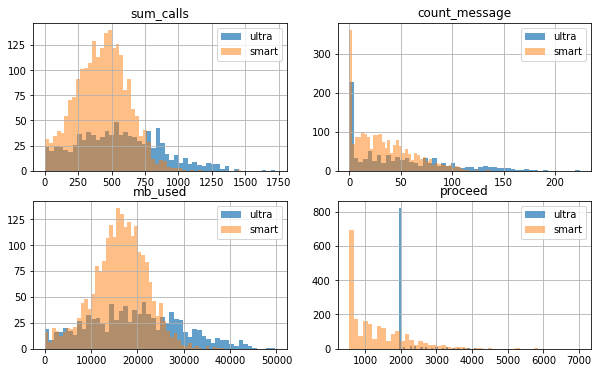

In [46]:

columns = ['sum_calls','count_message','mb_used','proceed']
fig, axes = plt.subplots(2,2,figsize=(10,6))
axes = axes.flatten()
for col, ax in zip(columns, axes):    
    ax.hist(ultra_months_used[col], bins=50, alpha=0.7, label=('ultra'))    
    ax.hist(smart_months_used[col], bins=50, alpha=0.5, label='smart')    
    ax.legend()
    ax.set_title(col)    
    ax.grid()
plt.show()

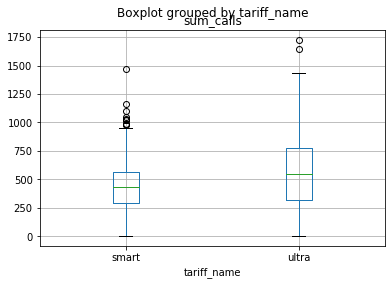

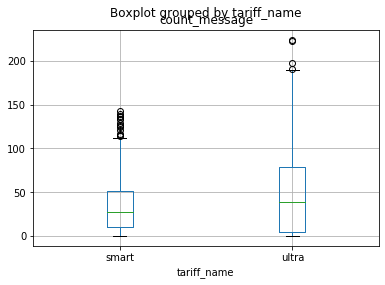

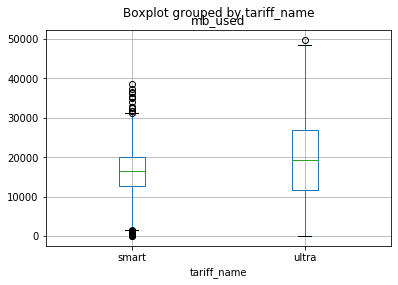

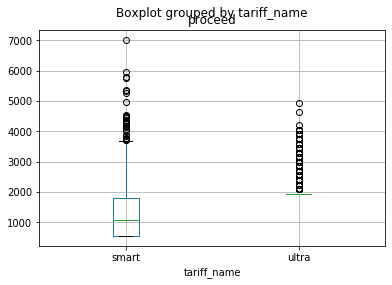

In [47]:
for col, ax in zip(columns, axes):
    ax=summary_months_used.boxplot(col, by='tariff_name')

#### Построим гистограммы:
- для израсходованных минут разговора по месяцам;
- по количеству отправленных сообщений по месяцам;
- по объему израсходованного интернет-трафика по месяцам;
- помесячной выручки с каждого пользователя 

Для абонентов "Смарт" лимит количества звонков 500 минут, большинсво значений симметрично расположено вокруг этого лимита, в тарифе "Ультра" - лимит 3000 минут в месяц, но абоненты не приблизились к этой цифре.

По сообщениям для тарифа "Смарт" - лимит 50 сообщений, боьшинство пользователей все же не превышают этот лимит, абоненты тарифа "Ультра" не приблизились к своему максимуму в 1000 смс в месяц. Также на гистограмме сообщений большое количество значений около 0, они появились в результате формирования сводной таблицы по каждому пользователю. Большое количество пользователей вообще не пользуются смс. Лимит по интернет-трафику для "Смарт" 15Гб, "Ультра" - 30 Гб. Лишь половине пользователей "Смарт" хватает включенного в тариф трафика, большинству пользователям "Ультра" хватает 30Гб, однако и тут есть превышения лимита. 

На гистограмме "proceed" отображена помесячная выручка с каждого пользователя, абсолютное большинство абонентов "ultra" не превышают лимит, и платят лишь абонентскую плату. Большое количество пользователей "Смарт" также платят лишь абонентскую плату, однако некоторые пользователи превышают абонентскую плату "Ультра" в 1950 руб.

### Вывод
В среднем пользователи тарифа "Смарт" тратят 1325 руб в месяц, при абонентской плате в 550 руб,  среднее количество минут разговора - 430 при разбросе от 0 до 1000 минут, среднее число смс - 38, среднее число истраченного интернета - 16 Гб и разброс от 0 до 30Гб при лимите в 15 Гб. Средний чек - 1325 руб, стандартное отклонение 844 рубля, то есть затраты пользователей лежат от 0 до (1325+3*844 =) 3857 руб

Пользователи тарифа "Ультра" (включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика) в среднем тратят 560 минут, 61 смс и 19.7Гб интернета, стандартное отклонение выше для этих величин, чем у тарифа "Смарт", разброс количества звонков от 0 до 1500 минут,  сообщений от 0 до 200 смс, интернета от 0 до 50Гб. Средний чек -  2074 руб, стандартное отклонение 389 рубля, то есть затраты пользователей лежат от 0 до (2074+3*389 =) 3241 руб




### Шаг 4. Проверьте гипотезы

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Выясним, есть ли разница между средней выручкой абонентов тарифов «Ультра» и «Смарт». Нулевая гипотеза будет такая: "разницы между средней выручкой нет, средний чек абонентов разных тарифов равен". Для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind


In [48]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    ultra_months_used['proceed'], 
    smart_months_used['proceed'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.591200560388533e-137
Отвергаем нулевую гипотезу


Средний чек абонентов тарифов ultra и smart равны 2074 и 1324 руб соответственно. 
Полученное значение p-value очень мало, можно сделать вывод о значимом различии между средними чеками. Вероятность, что средний чек абонентов разных тарифов равен, практически равна нулю. 

#### Выясним, есть ли разница между средней выручкой пользователей из Москвы и из других регионов.
Нулевая гипотеза будет такая: "разницы между средней выручкой нет, средний чек абонентов разных регионов равен". 

In [49]:
# добавим в итоговую таблицу данные по городам проживания
proceed_city = summary_months_used.merge(users[['city','user_id']], on='user_id',how='left')
# выборка абонентов из Москвы
proceed_Moscow = proceed_city.query('city == "Москва"')
proceed_Moscow['proceed'].mean()

1566.5672131147542

In [50]:
# выборка абонентов не из Москвы
proceed_NoMoscow = proceed_city.query('city != "Москва"')
proceed_NoMoscow['proceed'].mean()

1545.1575663026522

In [51]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    proceed_Moscow['proceed'], 
    proceed_NoMoscow['proceed'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.55917801518978
Не получилось отвергнуть нулевую гипотезу


Средний чек пользователей из разных городов мало отличается 1566 руб для Москвы и 1545 руб для других городов.

Полученное значение p-value говорит о том, что с вероятностью в почти 56% большее различие между средними чеками можно получить случайно. У нас не получилось отвергнуть нулевую гипотезу, можно сделать вывод о равенстве между средними чеками между абонентами Москвы и других регионов.

#### Посмотрим разницу между чеками пользователей разных тарифов для Москвы и других регионов. 
Абоненты "Ультра"

Нулевая гипотеза будет такая: "разницы между средней выручкой нет, средний чек абонентов разных регионов равен"

In [52]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    proceed_Moscow.query('tariff_name == "ultra"')['proceed'], 
    proceed_NoMoscow.query('tariff_name == "ultra"')['proceed'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8684523227708136
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что с вероятностью в почти 86% между средними чеками  будет небольшое различие. У нас не получилось отвергнуть нулевую гипотезу, можно сделать вывод о равенстве между средними чеками между абонентами Москвы и других регионов для пользователей тарифа "Ультра"

Оценим разницу между чеками пользователей для Москвы и других регионов для абонентов "Смарт". 
Нулевая гипотеза будет такая: "разницы между средней выручкой нет, средний чек абонентов "Смарт" разных регионов равен"

In [53]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    proceed_Moscow.query('tariff_name == "smart"')['proceed'], 
    proceed_NoMoscow.query('tariff_name == "smart"')['proceed']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1596955279669269
Не получилось отвергнуть нулевую гипотезу


 У нас не получилось отвергнуть нулевую гипотезу, можно сделать вывод о незначительном различии между средними чеками между абонентами Москвы и других регионов. Полученное значение p-value говорит о том, что с вероятностью в почти 16% большее различие между средними чеками можно получить случайно.

### Шаг 5. Общий вывод

В среднем пользователи тарифа "Смарт" тратят 1325 руб в месяц, при абонентской плате в 550 руб, стандартное отклонение 844 рубля. Затраты пользователей  тарифа "Смарт" разбросаны от 0 до 3857 руб.
Средний чек пользователей тарифа "Ультра"-  2074 руб, стандартное отклонение 389 рубля, то есть затраты пользователей лежат от 0 до 3241 руб.
Абсолютное большинство абонентов "Ультра" не превышают лимит, и платят лишь абонентскую плату в 1950 руб. Меньше половины пользователей "Смарт" платят лишь абонентскую плату.

Абоненты тарифа "Ультра" различаются поведением, кто-то полностью использует месячный лимит по звонкам, смс и интрнету, кто-то очень мало пользуется сотовой связью, однако платят высокую абонентскую плату. Для абонентов "Смарт" разброс значений по израсходованным минутам и количеству интернета меньше, чем у абонентов "Ультра". Половина пользователей тарифа "смарт" превышает лимит по звонкам и количеству интернета, включенного в тариф. Большинству пользователям "Ультра" хватает минут, сообщений и интернета, включенный в тариф, однако и тут есть превышения лимита. 

При проверке гипотезы о различии средней выручки пользователей тарифов «Ультра» и «Смарт» сделан следующий вывод: различие между средними чеками значимо. Вероятность, что средний чек абонентов разных тарифов равен, практически равна нулю. То есть средний чек пользователей "Ультра" значительно  выше среднего чека пользователей тарифа "Смарта"
При проверке другой гипотезы, получилось, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
Для компании "Мегалайн" выгоднее тариф "Ультра", ведь средний чек пользователей "Ультра" выше среднего чека пользователей тарифа "Смарта" независимо от региона страны. Кроме того не все пользователи тарифа "Ультра" используют полностью лимиты, включенные в тариф. 